<a href="https://colab.research.google.com/github/pszwed-ai/lab-eksploracja-danych/blob/main/Bike_Sharing_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Upgrade scikit-learn

Chcemy obliczać MAPE, odpowiednia funkcja pojawiła się w nowszej wersji

In [ ]:
!pip install scikit-learn --upgrade

# 2. Załaduj zbiór danych

Zbiór jest opublikowany w repozytorum UCI jako [Bike Sharing Dataset](https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset)

In [ ]:
!wget https://dysk.agh.edu.pl/s/7WTyMDwjcQQCsfx/download -O Bike-Sharing-Dataset.zip
!unzip Bike-Sharing-Dataset.zip
!cat Readme.txt

### Załaduj do Pandas DataFrame

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv('day.csv',parse_dates=['dteday'])
df.head()



,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### 2.1 Narysuj histogramy

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f86a3d014d0>,
      dtype=object)

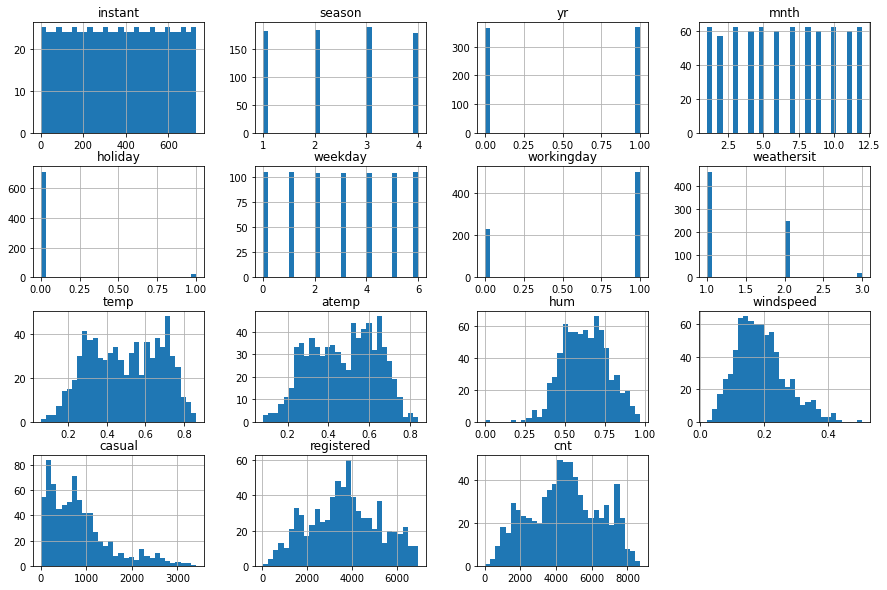

In [4]:
plt.rcParams["figure.figsize"] = (15,10)
df.????(bins=30)

### 2.2 Narysuj wykresy dzienne dla wypozyczeń (registered,casual, wszystkich)

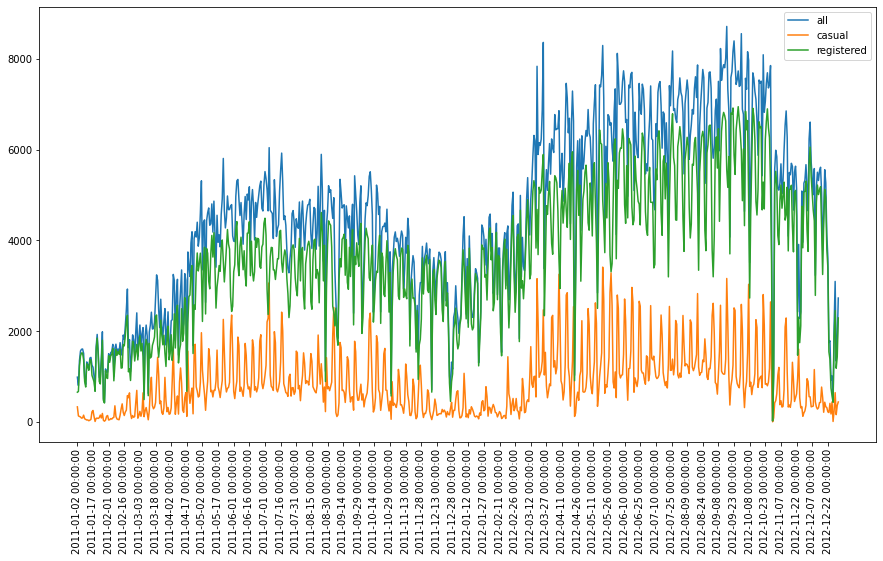

In [7]:
plt.rcParams["figure.figsize"] = (15,8)
fig = plt.figure()
plt.plot(df['instant'],?????,label='all')
plt.plot(df.instant,?????,label='casual')
plt.plot(df.instant,?????,label='registered')
tick_marks = np.arange(1,df['instant'].max(),15)
labels = df['dteday'].iloc[tick_marks]
plt.xticks(tick_marks, labels,rotation=90)
plt.legend()
plt.show()

In [8]:
df2 = df[df.cnt<30]
df2.head()
# len(df)
df.cnt.quantile([0.002,0.1,0.25,0.5,0.75, 0.9,0.99])


0.002     435.6
0.100    1746.0
0.250    3152.0
0.500    4548.0
0.750    5956.0
0.900    7290.0
0.990    8163.7
Name: cnt, dtype: float64

# 3. Regresja (bez  przetwarzania wstępnego)

Będziemy starali się wyznaczyć wartość cnt (całkowitej liczby wypozyczeń). Oczywiście zachodzi:
$cnt = casual+registered$ 

Te kolumny sa liniowo zależne, więc zastanówmy się, czy będą potrzebne?

Porównamy wyniki dla:
1.   LinearRegression
2.   Ridge
3.   Lasso
4.   i obiecującego algorytmu XGBRegressor

**Dopsasuj modele, narysuj rysunki, umieść w sprawozdaniu metryki**


In [ ]:
# Użyteczne funkcje

import sklearn.metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from xgboost import XGBRegressor
 
scores={'r2':sklearn.metrics.r2_score,
        'mse':sklearn.metrics.mean_squared_error,
        'rmse':lambda y_true,y_pred : np.sqrt(sklearn.metrics.mean_squared_error(y_true,y_pred)),
        'maxe':sklearn.metrics.max_error,
        'med':sklearn.metrics.median_absolute_error,
        'mae':sklearn.metrics.mean_absolute_error,
        'mape':sklearn.metrics.mean_absolute_percentage_error,
        }

def train_and_test(X,y,regr=sklearn.linear_model.LinearRegression()):
  # print(regr)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

  regr.fit(X_train, y_train)
  y_pred = regr.predict(X_test)

  for k in scores:
    r = scores[k](y_test,y_pred)
    print(f'{k}:{r}')
  return scores['r2'](y_test,y_pred)

### Przygotuj dane

1. Usuń dane z DataFrame
*   Wszelkie klucze lub identyfikatory
*   Zmienną wyjściową (objaśnianą) i zmienne z nią w oczywisty sposób powiązane 

2. Zamień datę na postać numeryczną
3. Przekonwertuj do tablicy ```numpy```


In [ ]:
df2 = df.drop(columns=['instant','casual','registered','cnt'])
df2.dteday = pd.to_numeric(df2.dteday) 
X=df2.to_numpy()
y=df.cnt.to_numpy()

**Wyznacz najlepszy algorytm na podstawie miary r2**

**Narysuj wszystkie przebiegi**  pokazujące prawdziwą i przewidywaną wartość cnt

In [ ]:


# print(f'cnt.min={y.min()} cnt.max={y.max()}')

predictors =[LinearRegression(),
            Ridge(solver='svd'),
            Lasso(max_iter=10000),
            XGBRegressor()
            ]
max_r2= ???
 
for reg in predictors:
  print(f'------ {reg.__class__.__name__} -----')
  r2 = train_and_test(X,y,reg)
  if r2>???:

print(f'Best: {best_reg.__class__.__name__} r2={max_r2}')

def plot(X,y,reg,start=0,end=-1):
  y_pred=reg.predict(X)
  if end==-1:
    end=X.shape[0]
  x = np.arange(start,end)
  plt.plot(x,y[start:end],label='true')
  plt.plot(x,y_pred[start:end],label='pred')
  plt.legend()
  plt.title(reg.__class__.__name__)
  plt.show()

plot(X,y,predictors[????])


# 4. Przetwarzanie wstępne & regresja


## 4.1 Czy atrybuty są skorelowane z wartością wyjściową?

dla 
* season
* mnth
* weekday
* weathersit
* holiday
* workingday

oblicz współczynnik Pearsona i wyświetl zależność cnt od atrybutu (wykres typu scatter)

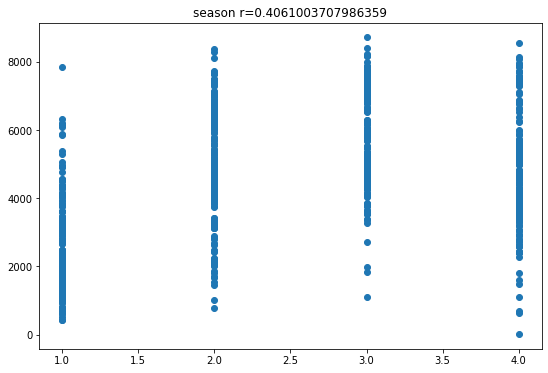

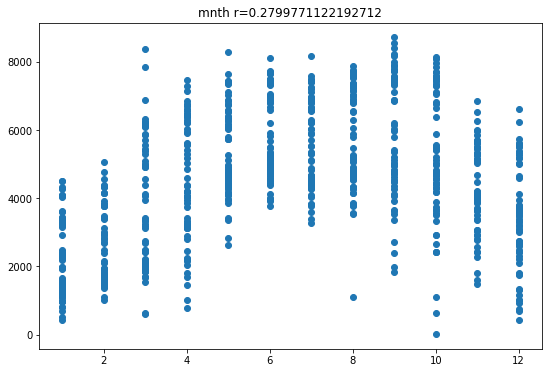

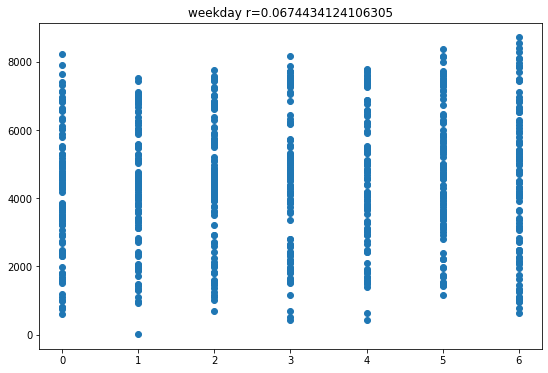

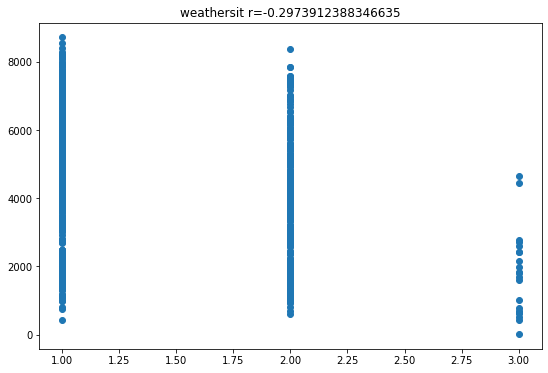

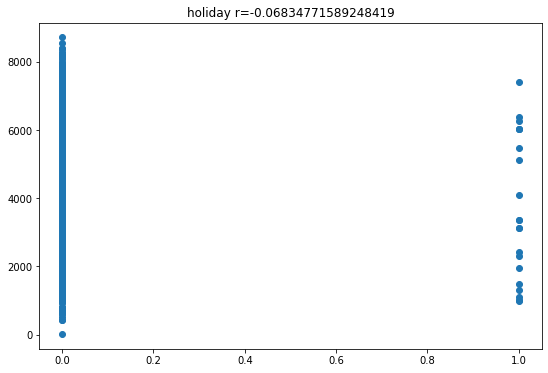

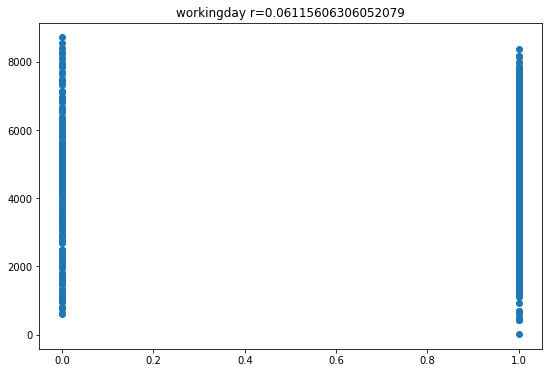

In [ ]:
import scipy.stats
plt.rcParams["figure.figsize"] = (9,6)
series=[???]

for s in series:
  r,p = scipy.stats.pearsonr(s,df.cnt)
  plt.figure()
  plt.scatter(????,df.cnt)
  plt.title(f'{s.name} r={r}')
  plt.show() 

## 4.2 Konwersja one hot

1. Dla wybranych przez siebie atrybutów dokonaj konwersji one-hot za pomocą funkcji pd.get_dummies(). Oczywiście usuń też ten atrybut z DataFrame
2. df.dteday to sa wartości liczone w nanosekundach od 1970. Przeskalujmy je dzieląc przez 1e18
2. Dodaj cechy wielomianowe pochodne de.dteday


In [ ]:
df_season = pd.get_dummies(df.season, prefix='season_')
df_month = pd.get_dummies(????, prefix='month_')
# df_hr = pd.get_dummies(df.hr, prefix='hr_')
df_weekday = ????
df_weathersit = ???

df2 = df.drop(columns=['instant','casual','registered','cnt', ???? ...])
# Polynomial features, normalziacja
df2['dteday']=pd.to_numeric(df2.dteday)/1e18

degree=???? # dobierz wartość eksperymentalnie
for i in range(2,degree):
  df2['dteday'+str(degree)]=df2.dteday**degree
# konkatenacja kilku data frame w jedną
df3 = pd.concat([df2,df_season,?????],axis=1)
df3.head()

# Konwersja na numpy
X=df2.to_numpy()
y=df.cnt.to_numpy()


**a. Znajdź najlepszą metodę predykcji**

**b. wyświetl wykresy dla wszystkich metod**

**c. możesz wybrać bardziej interesujące fragmenty wykresu do wyświetlenia (parametry start=, end= funkcji plot)**

------ LinearRegression -----
r2:0.6757334068309047
mse:1014535.1514123521
rmse:1007.2413570799961
maxe:3511.8549644490413
med:577.2966541922433
mae:754.7483866583543
mape:0.1950068268976175
------ Ridge -----
r2:0.6850995741325769
mse:985231.158458011
rmse:992.5881111810735
maxe:3506.746181749375
med:579.5396067520146
mae:742.0861038231368
mape:0.19312752813096032
------ Lasso -----
r2:0.677041101604364
mse:1010443.7576550533
rmse:1005.2083155520816
maxe:3504.738687619836
med:574.6526050335015
mae:750.1454315008098
mape:0.19362457109829004
------ XGBRegressor -----
[13:39:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
r2:0.8152048313800887
mse:578169.9327821507
rmse:760.3748633287075
maxe:3395.970703125
med:377.4145202636719
mae:534.1400229714134
mape:0.14277933791427344
Best: XGBRegressor r2=0.8152048313800887


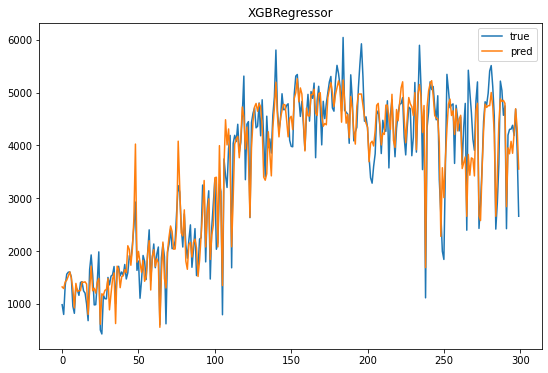

In [ ]:

predictors =[LinearRegression(),
            Ridge(solver='svd'),
            Lasso(max_iter=10000),
            XGBRegressor()
            ]

best_reg = None
for reg in predictors:
  print(f'------ {reg.__class__.__name__} -----')
  r2 = train_and_test(X,y,reg)

print(f'Best: {best_reg.__class__.__name__} r2={max_r2}')

plot(X,y,predictors[3],0,10)


# 5. Regresja szeregów czasowych
Interesuje nas zależność cnt od dteday. Dodamy cechy odpowiedzialne za ogólny trand i oscyklacje



## 5.1 Dopasuj krzywą trendu
1. Zastosuj cechy wielomianowe wybranego przez siebie stopnia
2. Oblicz metryki


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   dteday     731 non-null    float64
 1   yr         731 non-null    int64  
 2   temp       731 non-null    float64
 3   atemp      731 non-null    float64
 4   hum        731 non-null    float64
 5   windspeed  731 non-null    float64
 6   dteday8    731 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 40.1 KB
[ 0.00000000e+00 -2.51873284e+12  3.84494810e+12 -2.93421218e+12
  1.11940214e+12 -1.70791094e+11]


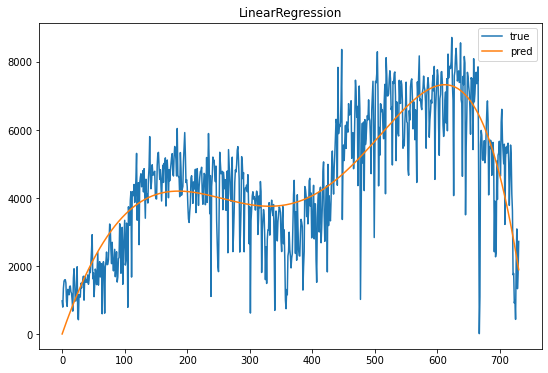

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
df2.info()
df2.max()

df2.shape

x=df2.dteday.to_numpy()
y=df.cnt

# X = np.stack((x,x**2,x**3,...),axis=-1)
poly = PolynomialFeatures(degree=???)
X=poly.fit_transform(x.reshape(-1,1))

regr = LinearRegression()
regr.fit(X,y)
print(regr.coef_)
plot(X,y,regr)


## 5.2 Czy przebieg jest periodyczny?

Zastosujemy transformację Fouriera i zobaczymy, dla jakich częstotliwości mamy duże amplitudy?

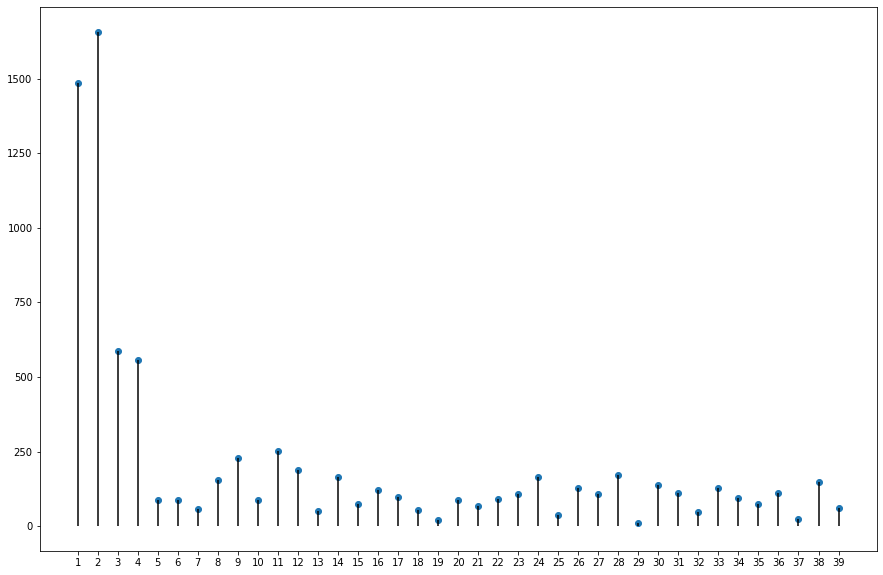

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack

y=df.cnt.to_numpy()
x = np.arange(-y.shape[0]//2,y.shape[0]//2)

yf = scipy.fftpack.fft(y)

N=y.shape[0]

yf = scipy.fftpack.fft(y)
yf[0]=0
xf = np.arange(1,40)

plt.scatter(xf, 2.0/N * np.abs(yf[1:40]))
plt.vlines(xf, np.zeros(39),2.0/N * np.abs(yf[1:40]))
plt.xticks(xf)
plt.show()


## 5.3 Dodajemy cechy okresowe
Dodajemy ortogonalne funkcje $\cos(\frac{2\pi x}{T_i})$ i $\sin(\frac{2\pi x}{T_i})$ 

Okres $T_i$ to wielokrotność jednego dnia. Ile to jeden dzień?

In [ ]:
print(x[2]-x[1])

print(df2.dteday[1]-df2.dteday[0])
T = 24*60*60/1e9
print(T)

 

8.6400000000042e-05
8.639999999981995e-05
8.64e-05


### Przygotowujemy dane dla liniowej regresji
* wpierw cechy wielomianowe
* następnie okresowe

In [ ]:
flist = [x]

degree=????
for i in range (2,degree):
  flist.append(x**i)

periods=[1,2,3,4,9,11,24,28,90]

for p in periods:
  flist.append(np.cos(2*np.pi*x/T))
  flist.append(np.sin(2*np.pi*x/T))

X=np.stack(flist,axis=1)


**Przetestuj kilka algorytmów regresji, zrób wykresy, wybierz najlepszy**

Przetsetsuj wszystkie 4, poniżej przykład dla XGBRegressor, który zwykle okazywał się najlepszy


[13:54:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
r2:0.7624071326225841
mse:743358.4610843436
rmse:862.1823827267312
maxe:4205.81591796875
med:451.1103515625
mae:613.3948067405007
mape:0.1722257283776105


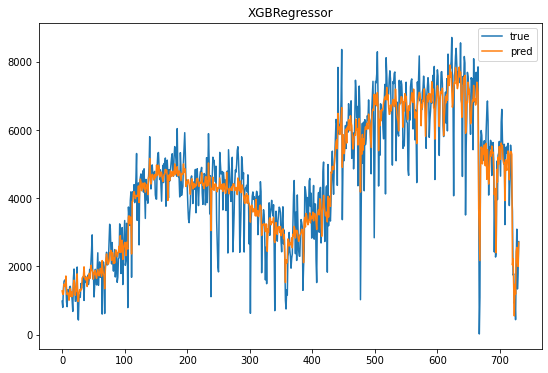

In [ ]:
regr = XGBRegressor()
train_and_test(X,y,regr)
plot(X,y,regr)
